# COVID-19 Visualizations, the Good, the Bad and the Malicious

> PyData Global, November, 2020
### Ron Li 
> Data science instructor, senior data scientist at Galvanize, Inc

# Outline
0. Introduction about myself and the project
1. A short overview of basic scientific facts about COVID-19
2. The critical review of visualization examples
3. Lessons learned

# 0. Introduction of myself 

* Data science instructor at Galvanize, based in LA.
    * teaching motto: I teach my students in a way that I want to be taught. 
* Studied physics (Ph.D. ABD) and electrical engineering (master's degree) at USC
* Joined Information Sciences Institute as a research programmer
* Published research papers in physics, chemistry and knowledge graph. One paper for each domain.😃
* Published a book: [Hands-On Statistics for Data Science](https://www.amazon.com/dp/B08GY7LF3N/ref=tsm_1_tp_tc)
    * promotion code for PyData audience:
* A keen fan of **reproducibility** and **first-principle** thinking. 
<img src="https://pbs.twimg.com/profile_images/1217496129031434240/HcKDJMsu_400x400.jpg" alt="potrait" width="200px"/>

# 0. Introduction of the project

COVID-19, the pandemic that kills more than 1 million people by the beginning of October (When I proposed this talk on May 18th. COVID-19 death toll is 30K+ globally.) It is also the hot topic in data analytics/science. Media, research institutes and data scientists created many visualization projects. Some projects are informative and creative, some are flawed. Quite a few are designed to mislead people without analytical skills. I think it is my duty to make a critical review of them.


This project's target audience is **beginners**. There are no fancy machine learning algorithms or parallel computing of thousands of cores. The goal of this project is to educate, to raise awareness and to fight misinformation.

# 1. A short overview of basic scientific facts about COVID-19
### 1.1 Define FACT
> A scientific fact is a repeatable careful observation or measurement (by experimentation or other means), also called empirical evidence. (Wikipedia)

However, from a non-philosophical perspective, a scientific fact can be referred as something that 

> Was recognized by the scientific community collectively but open to rebuttal.

How about ongoing emergence of facts?

> Has went through scrutinous scientific examination like peer review or [double blind randomized controlled trial](https://youtu.be/xDjVwXM8ESE?t=66).



# 1. A short overview of basic scientific facts about COVID-19
### 1.2 A list of Facts
1. COVID-19 virus spreads through air and masks reduce the risk of infection
2. COVID-19 virus is not synthesized. It originally came from animal, likely bats.
3. COVID-19 is more deadly than a `common flu`.
4. COVID-19 is more damaging for older adults and people who have severe underlying medical conditiosn.


### 1.3 A list of sources of scientific facts
1. [World Health Organization](https://www.who.int/)
2. [Centers for Disease Control and Prevention, United States](https://www.cdc.gov/coronavirus/)
3. [Johns Hopkins Medicine](https://www.hopkinsmedicine.org/)
4. [Department of Health & Social Care, UK](https://www.gov.uk/coronavirus)

# 1. A short overview of basic scientific facts about COVID-19
## Criteria to determine the visualization quality
 1. What is the information that the visualization tries to convey? Does it agree with the scientific **facts**?
 2. What is the quality of the data source?
 3. What kind of plot and aesthetic elements do the visualization use? Do such visual elements help or not?
 
 > This is a rough mapping of the so-called ggplot2 [grammar](https://www.r-bloggers.com/2014/03/a-simple-introduction-to-the-graphing-philosophy-of-ggplot2/). First, consider the data, then the geometry and aethetics ( how data is represented and decorated).


# 2. A critical review of visualization examples

### A critical review of visualization examples
1. Original visualization
2. Attempt to reproduce the visualization
3. Comments according to our review criteria 

# 2. A critical review of visualization examples
### Example 1. Confirmed case of COVID-19 by country from Fox News
### Original Visualization
[Image origin](https://twitter.com/dancow/status/1240316761171427328/photo/1). Captured date: March 18, 2020
![Total number of patients](https://pbs.twimg.com/media/ETZ9a07WsAAcQvP?format=jpg&name=large)

# 2. A critical review of visualization examples
### Example 1. Confirmed case of COVID-19 by country from Fox News
### Reproducibility

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

death_data = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_deaths.csv")
march_18 = death_data[death_data["date"] == "2020-03-18"]
records = march_18.fillna(-1).reset_index().to_dict()
records = {key: val[0] for key, val in records.items()}
records["United States of America"] = records["United States"] 
del records["United States"] 
del records["index"]
del records["World"]
del records["date"]
# record_names = set(records.keys())
# map_country_names = set(map(lambda country: country.attributes["ADMIN"], countries))
# in the record but not in the map
# record_names - map_country_names
# on the map but not in the records
# map_country_names - record_names

def death_2_color(death: int) -> tuple:
    if death < 0:
        return (0,1,1) # aqua, indicating no data
    elif death <= 10:
        return (1, 1, 0) # dim yellow
    elif death <= 25:
        return (1, 0.5, 0) # orange
    elif death <= 50:
        return (1, 0, 0) # orange
    elif death <= 100:
        return (1, 0, 0) # red
    elif death <= 1000:
        return (1, 0, 0) # red
    elif death <= 10000:
        return (1, 0, 0) # red
    else:
        return (1, 0, 0) # red


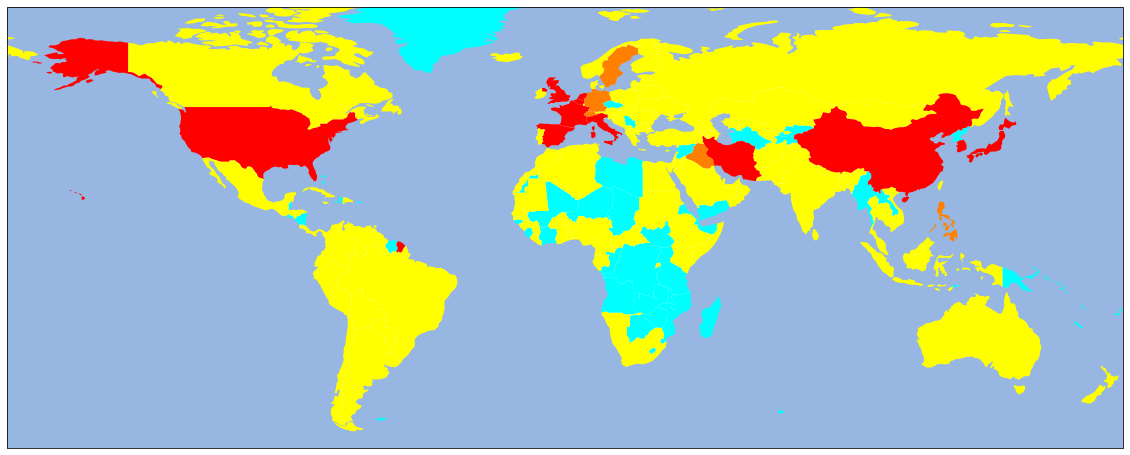

In [102]:
# https://gis.stackexchange.com/questions/88209/python-mapping-in-matplotlib-cartopy-color-one-country
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN)
ax.set_extent([-150, 60, -25, 60])
reader = shpreader.Reader(shpfilename)
countries = list(reader.records())
for country in countries:
    country_name = country.attributes['ADMIN']
    try:
        country_color = death_2_color(records[country_name])
    except: 
        country_color = (0,1,1) # default no data
    ax.add_geometries([country.geometry], 
                      ccrs.PlateCarree(),
                      facecolor=country_color,
                      label=country_name
                     )

## What about the actual death toll of the red group?

In [105]:
sorted([(country, death) for country, death in records.items() if death >= 50], key = lambda x: x[1])

[('United Kingdom', 82),
 ('South Korea', 86),
 ('United States of America', 108),
 ('France', 175),
 ('Spain', 491.0),
 ('Iran', 988),
 ('Italy', 2505),
 ('China', 3241)]

### Comments
1. The visualization tries to represent the death toll of COVID-19 by country.
2. The quality of the data source seems to be good enough considering the releasing time
    1. No data source is provided.
3. The visualization used color to represent the death toll, which is a bad decision.
    1. No visual differences for countries with death toll more than 50.
    2. Size differences of countries influence judgement.
    

# 2. A critical review of visualization examples
### Example 2. New Cases Per Day from Fox News
### Original Visualization
 
 1. [Image Origin](https://twitter.com/Jennmparks/status/1248364415260315653) Captured date: April 9, 2020
 ![New Cases Per Day](https://pbs.twimg.com/media/EVMU0bJU0AA7DTe?format=jpg&name=small)

# 2. A critical review of visualization examples
### Example 2. New Cases Per Day by Fox News
### Reproducibility

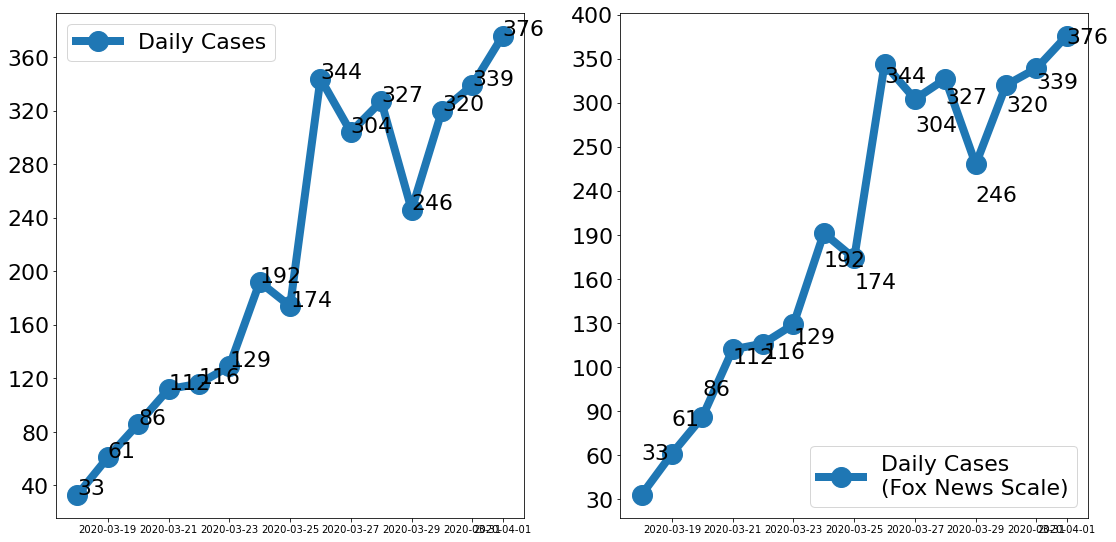

In [245]:
from scipy import interpolate
figure, ax = plt.subplots(1,2,figsize=(16,8),tight_layout=True)
dates =  pd.date_range('2020-03-18', periods=15, freq='D')
daily_cases = [33,61,86,112,116,129,192,174,344,304,327,246,320,339,376]
plt.rcParams.update({'font.size': 22})
ax[0].set_yticks(np.linspace(0,400,11))
ax[0].plot( dates,daily_cases, label="Daily Cases", marker="o", 
           markersize=20,linewidth=8)
ax[0].legend()
ax[0].tick_params(axis='x', which='major', labelsize=10)
for x,y in zip(dates, daily_cases): 
    ax[0].text(x, y, str(y))
    
ticks = [30, 60,90,100,130,160,190,240,250,300,350,400]
ax[1].set_yticks(ticks)
daily_cases_mapped = interpolate.interp1d(ticks, np.linspace(0,400,12))(daily_cases)  
# The trick to use linear interpolated data to plot on uneven ticks
# https://stackoverflow.com/questions/30234921/python-plot-unevenly-distributed-axis
ax[1].plot(dates,daily_cases_mapped, label="Daily Cases \n(Fox News Scale)", marker="o",
           markersize=20,linewidth=8)
ax[1].legend()
ax[1].tick_params(axis='x', which='major', labelsize=10)
ax[1].yaxis.set_ticks(np.linspace(0,400,12))
# https://stackoverflow.com/questions/39540730/how-to-make-xticks-evenly-spaced-despite-their-value
ax[1].yaxis.set_ticklabels(ticks)
for x,y in zip(dates, daily_cases): 
    ax[1].text(x, y, str(y))

### Comments
1. The visualization tries to present the daily convirmed case in the United States
2. The quality of the data source seems to be good enough considering the releasing time
    1. No data source is provided.
3. The visualization used an uneven scale for no obvious reason
    1. The accelerating increasing trend (What we see is daily new cases, not total cases) is downplayed
    2. However, the downplay is **hidden**, at the boundary of **misleading**.

### Additional comments
> There are quite a lot of graphics from Fox News that you can find misleading. For example, the one below.

[image origin](https://www.mediamatters.org/fox-news/dishonest-fox-charts-obamacare-enrollment-edition). March, 2014

![Obamacare historical ](https://pbs.twimg.com/media/CTilLd3UsAAR7fG?format=jpg&name=small)

# 2. A critical review of visualization examples
### Example 3. A Context-free visualization
### Original Visualization
> Quoting the twitter [user](https://twitter.com/JohnBeaudoinSr/status/1272540900355461120?s=20) : I wrote 11 papers on COVID-19, masks, Sweden, etc.    CNN,MSNBC,BBC,NYTimes, WaPo, even Fox lie daily.  Data analysis shows differently than the narratives they push.  Normalized graph below.  COVID-19 follows standard curve with and without mitigation measures.

![](https://pbs.twimg.com/media/Eaj42D7WsAEaC8O?format=jpg&name=large)

# 2. A critical review of visualization examples
### Example 3. A Context-free visualization
###  Reproducibility (attempt)

There is no context about this visualization. The x-axis seems to be a time-like series but the y-axis is confusing.

Since the y-axis scale is a float number between 0 and 1. I tried to search for the [transmission rate](https://en.wikipedia.org/wiki/Transmission_risks_and_rates). However, the transmission rate for Massachusetts was never below 0.7 in 2020 since the outbreak of the virus. 

I failed to reproduce this visualization. If you know how, please let me know.

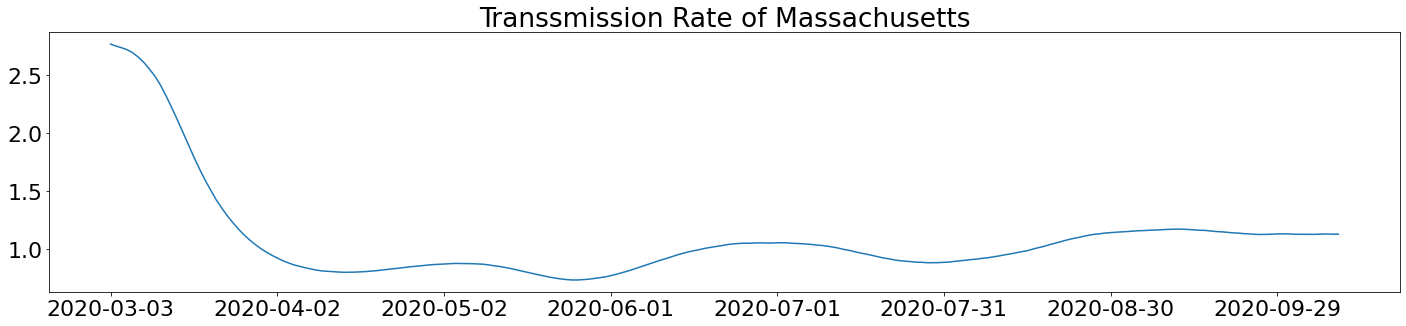

In [235]:
# transmission rate of Massachusetts
# https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib/36229671
import matplotlib.dates as dates
tr = pd.read_csv("https://d14wlfuexuxgcm.cloudfront.net/covid/rt.csv")
ma = tr[tr.region == "MA"][["date","mean"]]
plt.figure(figsize=(20,5),tight_layout=True)
plt.plot(ma["date"],ma["mean"]);
plt.xticks(np.arange(0, ma.shape[0]+1, 30))
plt.title("Transsmission Rate of Massachusetts");

### Comments
1. The visualization doesn't identify what issues it addresses or information it conveys.
2. There is **no** specification about the source of the data.
    1. No data source is provided.
3. The visualization has **no labe**, **no scale** and **no title**. It conveys no information at all.

# 2. A critical review of visualization examples
### Example 4. A comparison of COVID-19 cases and 5G tower installation
### Original Visualization

[original tweet](https://twitter.com/mona_cajun/status/1241921125665275904), March, 22, 2020
> 5G = #InfrasoundWeapon Eyes COVID 19 Map / 5G Map #SPECTRUM is Down in #Hawaii !! Thank you Q! #QAnon

> Quote from original post: Yep. That originated in Wuhan, where 5G was first introduced.
By Huawei.

![5G and Covid](https://pbs.twimg.com/media/ETwwpd8UYAEt1ts?format=jpg&name=small)

# 2. A critical review of visualization examples
### Example 4. A comparison of COVID-19 cases and 5G tower installation
###  Reproducibility
I didn't find reliable data for the 5G tower installation in data. When the data is available, I will update the reproducibility in the GitHub [repo](https://github.com/rongpenl/pydata-global-covid-visualization).

### Comments
1. The visualization tries to establish a cause-effect relationship between 5G tower installation and COVID-19 cases. The implied information is that 5G is the cause of COVID-19.
2. The visualization shows two images from different sources in parallel. One image is from New York Times, using semi-transparent circles to represent the number of confirmed COVID-19 cases. Another one is from an unknown source, claiming to be the number of installed 5G towers. **I couldn't identify the source of the image or the data source of the image**. If you know the source of the data, please let me know.
3. The visualization has **no labe**, **no scale** and **no title**. However, it is one of the most popular visualization for the 5G conspiracy theory.

### Comments (Cont'd)
The mistake in the visualization is the false reasoning of `causality`. 

The simultaneousness of two events don't necessarily establish the causality between two events.

There is a confouding factor in this case: population. For example, mobile service providers will priorities 5G tower building in areas with high population density. COVID-19 is also likely to spread faster in area where population density is high. 

Here is a [retracted research](https://pubmed.ncbi.nlm.nih.gov/32668870/) about the causality between COVID-19 and 5G.

[Confounding factor image from Wikipedia](https://en.wikipedia.org/wiki/Confounding)
![confounding](https://upload.wikimedia.org/wikipedia/commons/d/d5/Confounding.PNG)

### Comments (Cont'd)
Taco bell locations.

> [source](https://twitter.com/KampourakisK/status/1305764917153325056)

![taco bell](https://pbs.twimg.com/media/Eh8A0tTXcAAoi1d?format=jpg&name=large)

### Comments (Cont'd)
US populations. 
> [source](https://twitter.com/KampourakisK/status/1305764917153325056)
![US populations](https://pbs.twimg.com/media/Eh8BAq0X0AImhWb?format=jpg&name=medium)

# 3. Lessons learned

#### As a visualization creator.

1. Always ensure the quality of your data. Garbage in, garbage out.
2. Provide fully reproducible codes for your visualization.
3. Choose the right aesthetics for the right information.
4. Be ethical, never mislead audience (or your manager) on purpose.

# 3. Lessons learned (Cont'd)
#### As a visualization audience

1. Always the data source quality.
2. Identify the reputation track of the visualization creator.
3. Be aware of the relationship between visual elements and the statistical information
    1. For example, colorfulness is usually not a good quantitative measure of quantity due to perception differences.
4. Be a critical thinker. Always ask questions like a 3rd reviewer.